# <ins> Futuristic Airbnb </ins>

Airbnb has successfully disrupted the traditional hospitality industry as more and more travelers decide to use Airbnb as their primary accommodation provider. Since its beginning in 2008, Airbnb has seen an enormous growth, with the number of rentals listed on its website growing exponentially each year. In Germany, no city is more popular than Berlin. That implies that Berlin is one of the hottest markets for Airbnb in Europe, with over 22,552 listings as of November 2018.Here we will be using Python with some packages like Pandas and Matplotlib to analyze data  to find a better Accommodation based on customer satisfaction and to improve the Airbnb business based on certain factors in Berlin.

<hr> </hr>

In [7]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import time
import json
import gmaps

In [10]:
#Reading Files and storing in Dataframes

Calendar_Summary_df = pd.read_csv("../Dataset/calendar_summary.csv")
Listings_df = pd.read_csv("../Dataset/listings.csv")
Listings_Summary_df = pd.read_csv("../Dataset/listings_summary.csv")
Neighbourhoods_df = pd.read_csv("../Dataset/neighbourhoods.csv")
Reviews_df = pd.read_csv("../Dataset/reviews.csv")
Reviews_Summary = pd.read_csv("../Dataset/reviews_summary.csv")
calendar_insideairbnb_df = pd.read_csv("../Dataset/calendar.csv")


### <ins> Identifying the Columns </ins>

In [13]:
calendar_insideairbnb_df.dtypes


listing_id          int64
date               object
available          object
price              object
adjusted_price     object
minimum_nights    float64
maximum_nights    float64
dtype: object

In [3]:
Listings_Summary_df.describe()

,id,scrape_id,thumbnail_url,medium_url,xl_picture_url,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,calculated_host_listings_count,reviews_per_month
count,2.255200e+04,2.255200e+04,0.0,0.0,0.0,2.255200e+04,0.0,22526.000000,22526.000000,22552.000000,...,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,0.0,22552.000000,18638.000000
mean,1.571560e+07,2.018111e+13,NaN,NaN,NaN,5.403355e+07,NaN,2.330685,2.330685,52.509824,...,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,NaN,1.918233,1.135525
std,8.552069e+06,4.812607e+00,NaN,NaN,NaN,5.816290e+07,NaN,19.947823,19.947823,0.030825,...,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,NaN,3.667257,1.507082
min,2.015000e+03,2.018111e+13,NaN,NaN,NaN,2.217000e+03,NaN,0.000000,0.000000,52.345803,...,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,1.000000,0.010000
25%,8.065954e+06,2.018111e+13,NaN,NaN,NaN,9.240002e+06,NaN,1.000000,1.000000,52.489065,...,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.180000
50%,1.686638e+07,2.018111e+13,NaN,NaN,NaN,3.126711e+07,NaN,1.000000,1.000000,52.509079,...,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,0.540000
75%,2.258393e+07,2.018111e+13,NaN,NaN,NaN,8.067518e+07,NaN,2.000000,2.000000,52.532669,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.500000
max,2.986735e+07,2.018111e+13,NaN,NaN,NaN,2.245081e+08,NaN,1676.000000,1676.000000,52.651670,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,45.000000,36.670000


In [4]:
Listings_df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [5]:
Listings_Summary_df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [6]:
Neighbourhoods_df.columns

Index(['neighbourhood_group', 'neighbourhood'], dtype='object')

### <ins> Keeping the Necessary Columns </ins>

In [7]:
#Columns which are necessary alone we can store it in the below df. ()

#Calendar_Summary_df = 
#Listings_df = 
#Listings_Summary_df = 
#Neighbourhoods_df = 
#Reviews_df = 
#Reviews_Summary = 

### <ins> Data Cleaning </ins>

In [4]:
#Data Cleaning the Amenities Column

Amenities = Listings_Summary_df.amenities

Amenities_List = []

for x in Amenities:

        x=x.replace('"','')
        x=x.replace('{','')
        x=x.replace('}','')
        Amenities_List += x.split(',')
        
Amenities_New = pd.DataFrame(Amenities_List)

Amenities_New = Amenities_New.rename(columns = {0:"Amenities"})

Amenities_New.head()


,Amenities
0,TV
1,Cable TV
2,Wifi
3,Kitchen
4,Gym


In [5]:
#Calculating Ratings

Listings_Summary_df["Rating"] = round((Listings_Summary_df['review_scores_accuracy'] + Listings_Summary_df['review_scores_cleanliness'] + 
                                 Listings_Summary_df['review_scores_checkin'] + Listings_Summary_df['review_scores_communication'] +
                                Listings_Summary_df['review_scores_location'] + Listings_Summary_df['review_scores_value']) /6)
                    



## <ins> Visualizations </ins>

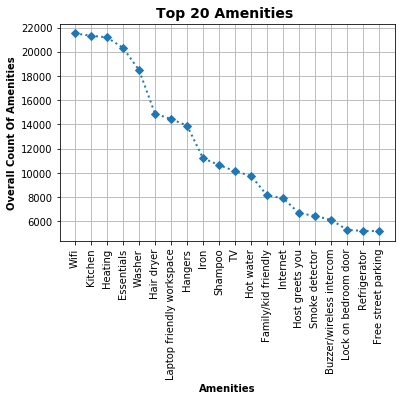

In [6]:
Amenities_Group = Amenities_New.groupby('Amenities')

Amenities_Count = Amenities_Group["Amenities"].count()

Amenities_Count = Amenities_Count.sort_values(ascending=False)

Amenities_Count = Amenities_Count.drop(['translation missing: en.hosting_amenity_50', 'translation missing: en.hosting_amenity_49'],axis=0)

Amenities_Count

plt.plot(Amenities_Count[0:20], linewidth=2.0, marker='D', linestyle=':')
plt.xticks(rotation=90)
plt.xlabel("Amenities", fontweight='bold' )
plt.ylabel("Overall Count Of Amenities" , fontweight='bold')
plt.title("Top 20 Amenities ",fontsize=14, fontweight='bold')

plt.grid()
plt.savefig("Visualizations/Top20_Amenities.png")
plt.show()


### <ins> Observation </ins>

From the above visualization, we can infer that Wifi, Kitchen, Heating, Essentials and Washer are the most important amenities to be considered for the successful of listing.For those who are already in the business and don't have those amenities, make sure the factibility of installing all or some of the amenities to grow your business.

In [14]:
from config import gkey

gmaps.configure(api_key=gkey)  

locations = Listings_Summary_df[["latitude","longitude"]]
Ratings = Listings_Summary_df["Rating"].astype(float)


fig = gmaps.figure()
heat_layer = gmaps.heatmap_layer(locations, weights=Ratings, 
                                 dissipating=False, max_intensity=10,
                                 point_radius=1)

fig.add_layer(heat_layer)
fig


ModuleNotFoundError: No module named 'config'

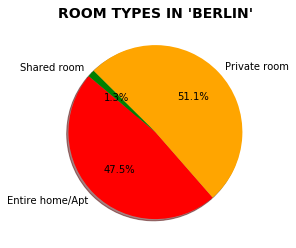

In [4]:

#average price of room types 
grouped_property_types = Listings_df.groupby(['room_type'])
#grouped_property_type_mean = grouped_property_types.mean()
grouped_property_type_mean = grouped_property_types.count()
grouped_property_type_mean
#new_index_grouped_room_mean = grouped_room_type_mean.reset_index(drop=True)
#new_index_grouped_room_mean
#explode = (0.1, 0, 0, 0)
colors = ["red", "orange", "green"]
 

grouped_property_df = pd.DataFrame(grouped_property_type_mean)
type = ["Entire home/Apt","Private room","Shared room"]
Price = round(grouped_property_df['id'],2)
#Price

plt.pie(Price,  labels=type, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

#plt.xlabel("CATEGORY OF ROOM TYPES", fontweight='bold' )
#plt.ylabel("COUNT OF HOSTED LISTINGS" , fontweight='bold')
plt.title("ROOM TYPES IN 'BERLIN'",fontsize=14, fontweight='bold')
plt.grid()

#need to add code for adding labels

In [8]:
#to retrive the month value
#Calendar_Summary_Price = (Calendar_Summary_df['price'])
#calendar_new_price = []
#for x in new_calendar_file['price']:
 #   x = x.replace('$','')
  #  calendar_new_price.append(x)
    
#type(calendar_new_price)
#new_calendar_file['available']== 't'    

In [21]:
new_cal_insideairbnb = calendar_insideairbnb_df.dropna(how = "any")
new_cal_insideairbnb_file = new_cal_insideairbnb.price.str[1:-3]
new_insideairbnb = new_cal_insideairbnb_file.str.replace(",","")
                                            
calendar_new_insideairbnb = new_insideairbnb.astype('int64')
insideairbnb_df = new_calendar_df = pd.DataFrame({'listing id':new_cal_insideairbnb['listing_id'],'date' : new_cal_insideairbnb['date'] , 'available':new_cal_insideairbnb['available']== 't' ,'price': calendar_new_insideairbnb})
new_inside = pd.to_datetime(new_cal_insideairbnb['date']).dt.to_period('M')
new_insideairbnb_df = pd.DataFrame({'date':new_month_and_year,'price':new_calendar_df['price']})
new_airbnb = new_insideairbnb_df.groupby(['date'])

new_inside_sum = new_airbnb.sum()
new_inside_sum.plot(y='price',kind = 'line', figsize = (15,5),color="blue")
plt.grid()

MemoryError: 

In [5]:

new_calendar_file = Calendar_Summary_df.dropna(how = "any")
#new_calendar_file['available']== 't' 
new_calendar_file_price = new_calendar_file.price.str[1:-3]
new_calendar_file_price_new = new_calendar_file_price.str.replace(",", "")
calendar_new_price = new_calendar_file_price_new.astype('int64')


new_calendar_df = pd.DataFrame({'listing id':new_calendar_file['listing_id'],'date' : new_calendar_file['date'] , 'available':new_calendar_file['available']== 't' ,'price': calendar_new_price})
#new_calendar_df.head()
#new_cal = pd.DataFrame({'listing id':new_calendar_df['listing_id'],'date' : new_calendar_df['date'] , 'price': calendar_new_price})
#new_cal.date[0]
#pd.to_datetime(df['birth_date']).dt.to_period('M')
#to retrive the month and year
new_month_and_year = pd.to_datetime(new_calendar_df['date']).dt.to_period('M')
new_cal_df = pd.DataFrame({'date':new_month_and_year,'price':new_calendar_df['price']})
new_group = new_cal_df.groupby(['date'])

new_sum = new_group.sum()
#new_sum
new_cal_df.dtypes


date     period[M]
price        int64
dtype: object

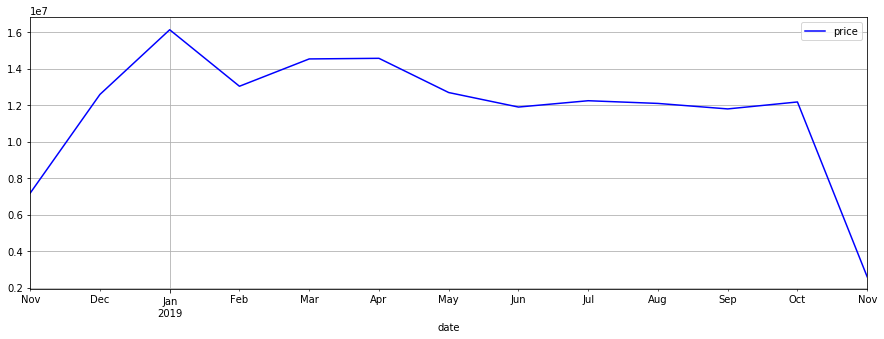

In [6]:
 new_sum.plot(y='price',kind = 'line', figsize = (15,5),color="blue")
plt.grid()
#pred = new_sum.get_prediction( dynamic=False)
#pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))